In [64]:
import pandas as pd


# Load "mpd2020.xlsx" (Historical GDP and Population Data)
mpd_df = pd.read_excel(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\mpd2020.xlsx", sheet_name="Full data")

# Load "FeedGrains.csv" (Agricultural Data)
feedgrains_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\FeedGrains.csv", header=None)

# Load "owid-co2-data.csv" (CO₂ Data)
co2_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\owid-co2-data.csv")

# === Assign Column Names to FeedGrains Dataset ===
feedgrains_df.columns = ["col1", "category", "col3", "commodity", "col5", "col6", 
                         "country", "col8", "col9", "col10", "metric", "col12", 
                         "unit", "year", "col15", "period", "col17", "market_type", 
                         "yield"]

# === Filter Relevant Columns from CO2 Dataset ===
co2_df_filtered = co2_df[["country", "year", "co2", "co2_per_capita", "population", "gdp"]]

# === Merge Datasets ===

# Step 1: Merge MPD with FeedGrains using left join (keep all from MPD)
combined_df = pd.merge(feedgrains_df, mpd_df, on=["country", "year"], how="left")

# Step 2: Merge with CO2 data using left join (still preserving MPD as base)
final_combined_df = pd.merge(combined_df, co2_df_filtered, on=["country", "year"], how="left")

# === Save the Final Dataset (Without Dropping NaNs) ===
final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data2.csv", index=False)

# === Display Some Info ===
print(f"Number of entries in MPD (base dataset): {len(mpd_df)}")
print(f"Number of entries in final combined dataset: {len(final_combined_df)}")
print(final_combined_df.head())



C:\Users\Admin\AppData\Local\Temp\ipykernel_10160\2808078076.py:8: DtypeWarning: Columns (0,2,4,5,7,9,11,13,14,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  feedgrains_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\FeedGrains.csv", header=None)


Number of entries in MPD (base dataset): 21682
Number of entries in final combined dataset: 524369
          col1        category               col3            commodity  \
0  SC_Group_ID   SC_Group_Desc  SC_GroupCommod_ID  SC_GroupCommod_Desc   
1            2  Supply and use                  9               Barley   
2            2  Supply and use                  9               Barley   
3            2  Supply and use                  9               Barley   
4            2  Supply and use                  9               Barley   

              col5       col6                    country             col8  \
0  SC_Geography_ID  SortOrder  SC_GeographyIndented_Desc  SC_Commodity_ID   
1                1      0.800              United States                1   
2                1      0.800              United States                1   
3                1      0.800              United States                1   
4                1      0.800              United States               

In [65]:
print(final_combined_df.columns)
print(len(final_combined_df.columns))

Index(['col1', 'category', 'col3', 'commodity', 'col5', 'col6', 'country',
       'col8', 'col9', 'col10', 'metric', 'col12', 'unit', 'year', 'col15',
       'period', 'col17', 'market_type', 'yield', 'countrycode', 'gdppc',
       'pop', 'co2', 'co2_per_capita', 'population', 'gdp'],
      dtype='object')
26


In [66]:
# Rename the columns in the final combined dataset
final_combined_df.columns = ['SC_Group_ID', 'SC_Group_Desc', 'SC_GroupCommod_ID', 'SC_GroupCommod_Desc', 
                            'SC_Geography_ID', 'SortOrder', 'SC_GeographyIndented_Desc', 'SC_Commodity_ID', 
                            'SC_Commodity_Desc', 'SC_Attribute_ID', 'SC_Attribute_Desc', 'SC_Unit_ID', 
                            'SC_Unit_Desc', 'Year_ID', 'SC_Frequency_ID', 'SC_Frequency_Desc', 'Timeperiod_ID', 
                            'Timeperiod_Desc', 'Amount', 'countrycode', 'gdppc', 'pop', 'co2', 'co2_per_capita', 
                            'population', 'gdp']
# Drop the second row of the final combined dataset
final_combined_df.drop(0, inplace=True)
print(final_combined_df)

       SC_Group_ID        SC_Group_Desc SC_GroupCommod_ID SC_GroupCommod_Desc  \
1                2       Supply and use                 9              Barley   
2                2       Supply and use                 9              Barley   
3                2       Supply and use                 9              Barley   
4                2       Supply and use                 9              Barley   
5                2       Supply and use                 9              Barley   
...            ...                  ...               ...                 ...   
524364           3  Exports and imports                17                Oats   
524365           3  Exports and imports                17                Oats   
524366           3  Exports and imports                17                Oats   
524367           3  Exports and imports                17                Oats   
524368           3  Exports and imports                17                Oats   

       SC_Geography_ID Sort

In [67]:
# Check whether the second row is deleted
print(final_combined_df.head())

  SC_Group_ID   SC_Group_Desc SC_GroupCommod_ID SC_GroupCommod_Desc  \
1           2  Supply and use                 9              Barley   
2           2  Supply and use                 9              Barley   
3           2  Supply and use                 9              Barley   
4           2  Supply and use                 9              Barley   
5           2  Supply and use                 9              Barley   

  SC_Geography_ID SortOrder SC_GeographyIndented_Desc SC_Commodity_ID  \
1               1     0.800             United States               1   
2               1     0.800             United States               1   
3               1     0.800             United States               1   
4               1     0.800             United States               1   
5               1     0.800             United States               1   

  SC_Commodity_Desc SC_Attribute_ID  ... Timeperiod_ID        Timeperiod_Desc  \
1            Barley               3  ...            6

In [68]:
print(final_combined_df.describe())

              gdppc            pop           co2  co2_per_capita  \
count  31589.000000   31589.000000  51251.000000    51251.000000   
mean   37747.862363  255134.016288  12925.174443       14.061992   
std    12293.484117   55877.009265  12151.935762        6.948945   
min     4599.876800   36869.000000     59.232000        1.627000   
25%    29611.000000  227726.463000   4941.708000        4.739000   
50%    38807.280000  263662.439000   5546.116000       16.852000   
75%    49266.915900  298988.427100  24258.168000       20.228000   
max    55334.739400  327834.658300  37791.570000       22.257000   

         population           gdp  
count  5.125100e+04  3.936300e+04  
mean   2.311759e+09  2.300593e+13  
std    3.037641e+09  3.301074e+13  
min    3.641407e+07  1.695929e+11  
25%    2.506750e+08  7.581108e+12  
50%    3.080235e+08  1.294742e+13  
75%    5.842056e+09  1.693763e+13  
max    8.091735e+09  1.301126e+14  


In [69]:
print(final_combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524368 entries, 1 to 524368
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SC_Group_ID                524368 non-null  object 
 1   SC_Group_Desc              524368 non-null  object 
 2   SC_GroupCommod_ID          516928 non-null  object 
 3   SC_GroupCommod_Desc        516928 non-null  object 
 4   SC_Geography_ID            524368 non-null  object 
 5   SortOrder                  524368 non-null  object 
 6   SC_GeographyIndented_Desc  524368 non-null  object 
 7   SC_Commodity_ID            524368 non-null  object 
 8   SC_Commodity_Desc          524368 non-null  object 
 9   SC_Attribute_ID            524368 non-null  object 
 10  SC_Attribute_Desc          524368 non-null  object 
 11  SC_Unit_ID                 524368 non-null  object 
 12  SC_Unit_Desc               524368 non-null  object 
 13  Year_ID                    52

In [70]:
print(final_combined_df.isnull().sum())

SC_Group_ID                       0
SC_Group_Desc                     0
SC_GroupCommod_ID              7440
SC_GroupCommod_Desc            7440
SC_Geography_ID                   0
SortOrder                         0
SC_GeographyIndented_Desc         0
SC_Commodity_ID                   0
SC_Commodity_Desc                 0
SC_Attribute_ID                   0
SC_Attribute_Desc                 0
SC_Unit_ID                        0
SC_Unit_Desc                      0
Year_ID                           0
SC_Frequency_ID                   0
SC_Frequency_Desc                 0
Timeperiod_ID                     0
Timeperiod_Desc                   0
Amount                            0
countrycode                  492779
gdppc                        492779
pop                          492779
co2                          473117
co2_per_capita               473117
population                   473117
gdp                          485005
dtype: int64


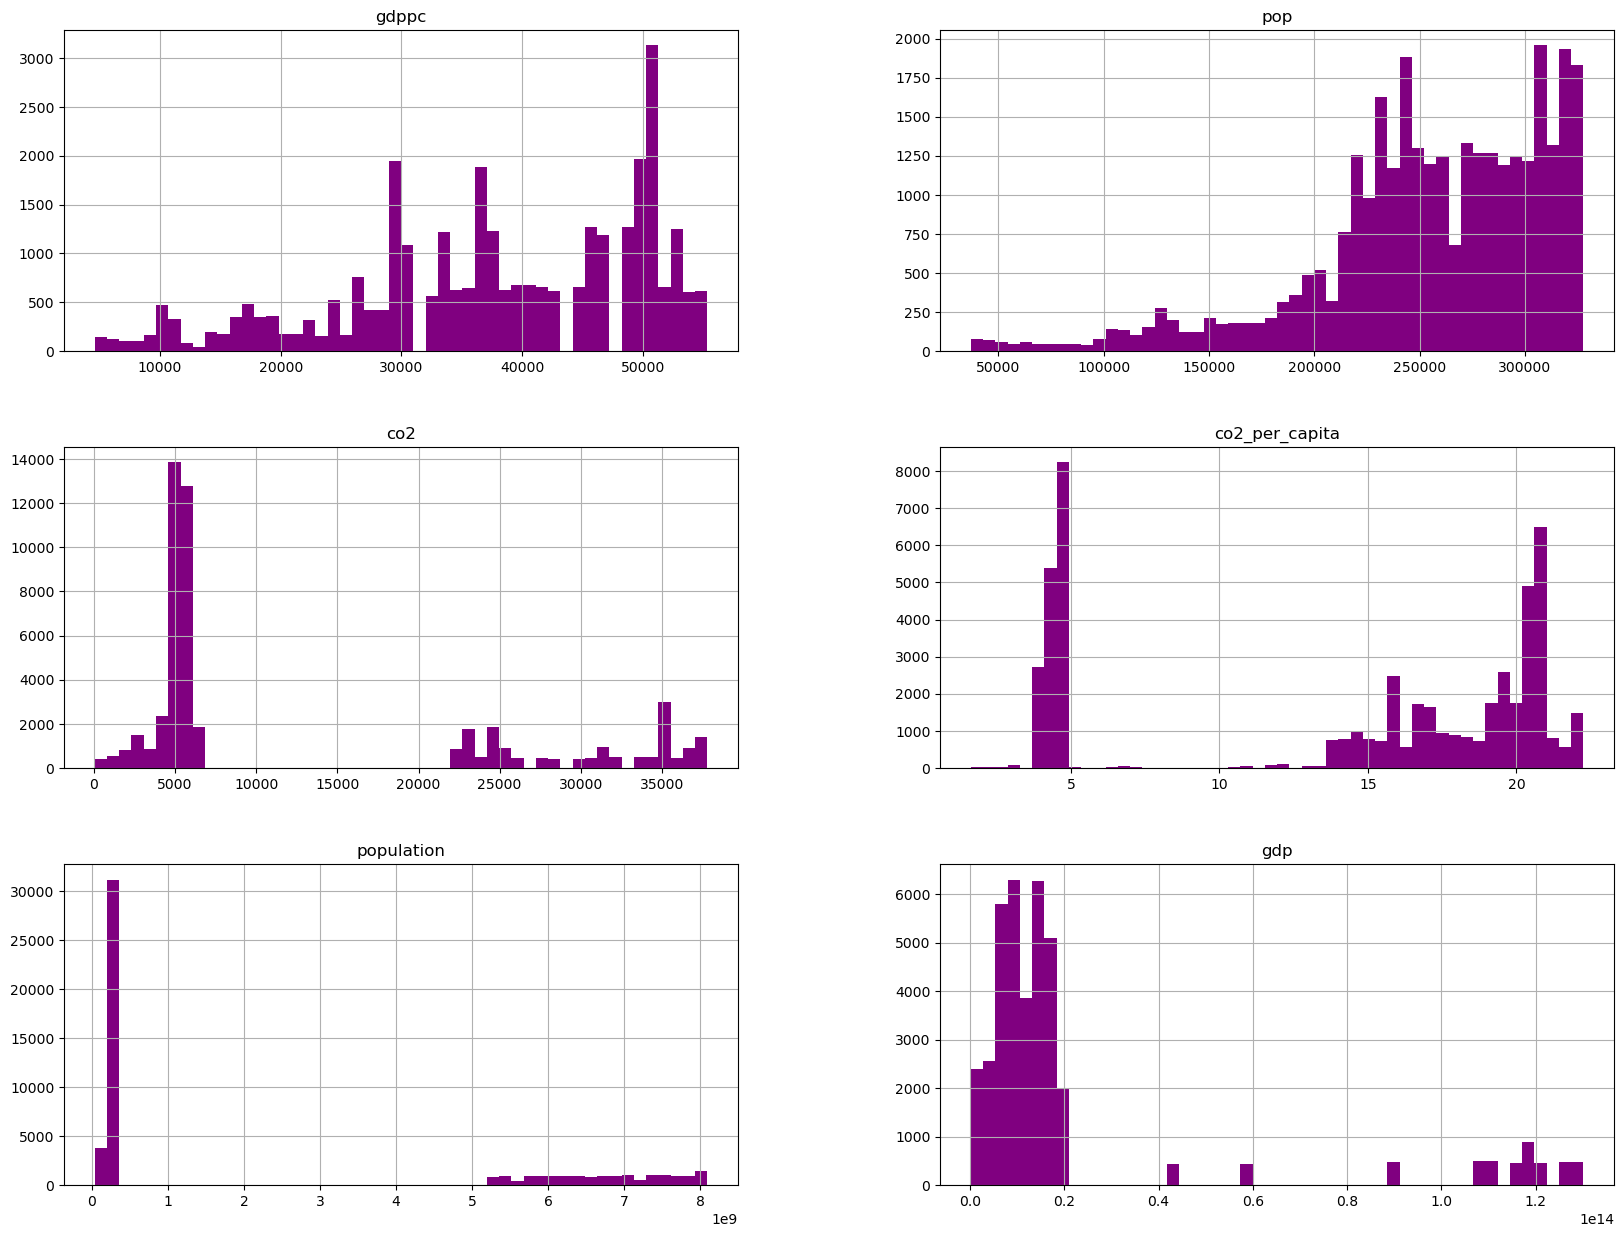

In [71]:
# Check whether there are any missing values in the final combined dataset and whether each column is skew or not. 
import matplotlib.pyplot as plt
final_combined_df.hist(bins=50, figsize=(20, 15), color='purple')
plt.show()

In [72]:
#check the minimum year and maximum year in the final combined dataset
year = final_combined_df['Year_ID'].astype(int)
print(year.min())
print(year.max())
# The intervals are as follows:
#1866 - 1886 as 1
#1887 - 1907 as 2
#1908 - 1928 as 3
#1929 - 1949 as 4
#1950 - 1970 as 5
#1971 - 1991 as 6
#1992 - 2012 as 7
#2013 - 2025 as 8

1866
2025


In [73]:
# Drop countrycode column which is not needed for the analysis
final_combined_df = final_combined_df.drop('countrycode', axis=1)

In [74]:
# Define the intervals
intervals = [
    (1866, 1886),
    (1887, 1907),
    (1908, 1928),
    (1929, 1949),
    (1950, 1970),
    (1971, 1991),
    (1992, 2012),
    (2013, 2025)
]

# Function to assign time period label based on year (as string)
def get_time_period(year_str):
    try:
        year = int(year_str)
        for idx, (start, end) in enumerate(intervals, start=1):
            if start <= year <= end:
                return idx
    except (ValueError, TypeError):
        return None  # Handle invalid or missing year values
    return None

# Apply the function
final_combined_df['Time_Range'] = final_combined_df['Year_ID'].apply(get_time_period)

# Preview result
print(final_combined_df[['Year_ID', 'Time_Range']].head(50))

   Year_ID  Time_Range
1     2005           7
2     2006           7
3     2007           7
4     2008           7
5     2009           7
6     2010           7
7     2011           7
8     2012           7
9     2013           8
10    2014           8
11    2015           8
12    2016           8
13    2017           8
14    2018           8
15    2019           8
16    2020           8
17    2021           8
18    2022           8
19    2023           8
20    2024           8
21    1951           5
22    1951           5
23    1951           5
24    1951           5
25    1951           5
26    1952           5
27    1952           5
28    1952           5
29    1952           5
30    1952           5
31    1952           5
32    1952           5
33    1952           5
34    1952           5
35    1952           5
36    1952           5
37    1952           5
38    1952           5
39    1953           5
40    1953           5
41    1953           5
42    1953           5
43    1953 

In [75]:
# Convert this dataset to a new CSV file
final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data3.csv", index=False)

In [76]:
final_combined_df.isnull().sum()

SC_Group_ID                       0
SC_Group_Desc                     0
SC_GroupCommod_ID              7440
SC_GroupCommod_Desc            7440
SC_Geography_ID                   0
SortOrder                         0
SC_GeographyIndented_Desc         0
SC_Commodity_ID                   0
SC_Commodity_Desc                 0
SC_Attribute_ID                   0
SC_Attribute_Desc                 0
SC_Unit_ID                        0
SC_Unit_Desc                      0
Year_ID                           0
SC_Frequency_ID                   0
SC_Frequency_Desc                 0
Timeperiod_ID                     0
Timeperiod_Desc                   0
Amount                            0
gdppc                        492779
pop                          492779
co2                          473117
co2_per_capita               473117
population                   473117
gdp                          485005
Time_Range                        0
dtype: int64

### EDA and Data Preprocessing Process

In [77]:
#Check the unique values in the 'countrycode' column
print(final_combined_df['SC_GeographyIndented_Desc'].unique())

['United States' '  World less U.S.' 'U.S. - Central IL'
 'U.S. - Gulf ports, LA' 'U.S. - Omaha, NE' 'U.S. - Chicago, IL'
 'U.S. - Kansas City, MO' 'U.S. - Toledo, OH' 'U.S. - Memphis, TN'
 'U.S. - Minneapolis, MN' 'World' 'U.S. - Midwest' 'U.S. - AR points'
 'U.S. - IL points, IL' 'U.S. - Central US' 'U.S. - AR'
 'U.S. - Domestic, East Coast' 'U.S. - New York, NY' '  Latin America'
 '      Central America' '      Caribbean' '      South America'
 '        European Union-15' '    Asia and Middle East'
 '      Middle East' '        South Asia' 'U.S. - Lawrenceburg, IN'
 'U.S. - St Louis, MO' '        Southeast Asia' '    Oceania'
 '      North Africa' '    Africa' '      Sub-Saharan Africa'
 '    Western Hemisphere' '      North America' '    Europe/Eurasia'
 '      European Union-25' '        Acceding-10' '      Asia'
 '      Other Europe' '      Former Soviet Union-12' '        East Asia'
 '        Canada' '        Greenland' '        Mexico' '        Guatemala'
 '        El Salvador'

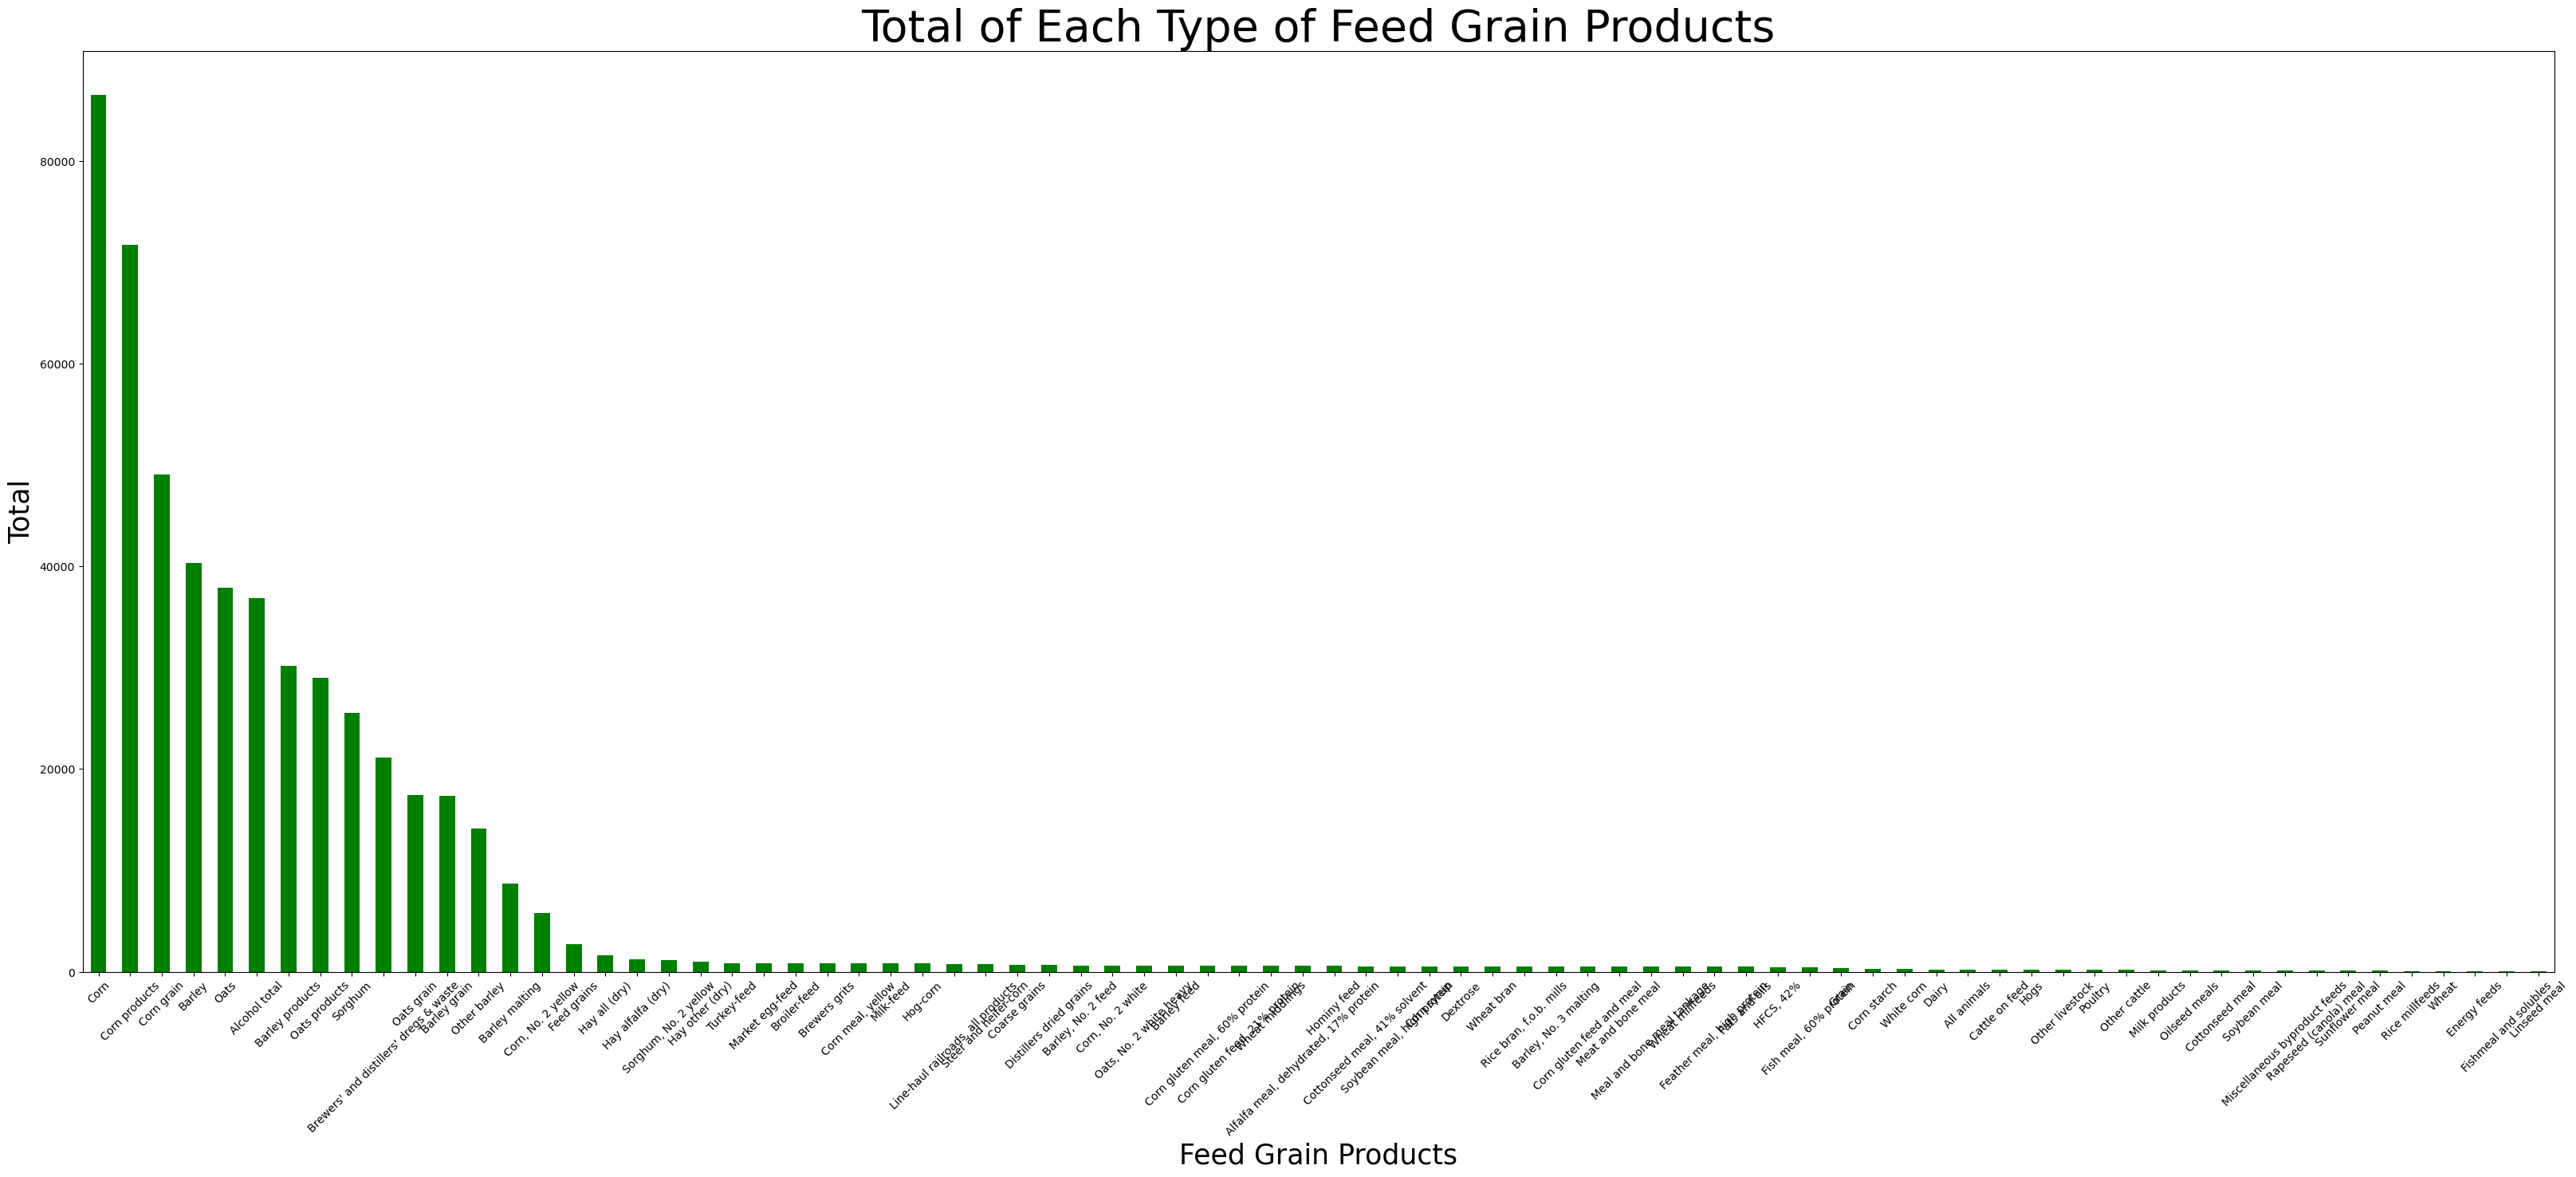

In [78]:
# Create histogram of the unique values of products in the 'SC_Commodity_Desc' column
final_combined_df['SC_Commodity_Desc'].value_counts().plot(kind='bar', figsize=(40, 15), color='green')
plt.title('Total of Each Type of Feed Grain Products', fontsize=40)
plt.xlabel('Feed Grain Products', fontsize=25)
plt.ylabel('Total', fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [79]:
# Check unique values in the 'SC_Commodity_Desc' column and SC_GroupCommod_Desc column
print(final_combined_df['SC_Commodity_Desc'].unique())
print()
print(final_combined_df['SC_GroupCommod_Desc'].unique())

['Barley' 'Feed grains' 'Coarse grains' 'Hay alfalfa (dry)' 'Corn'
 'Hay other (dry)' 'Hay all (dry)' 'Corn grain' 'Oats' 'All animals'
 'Barley feed' 'Barley malting' 'Broiler-feed' 'Market egg-feed'
 'Steer and heifer-corn' 'Hog-corn' 'Milk-feed' 'Turkey-feed' 'Grain'
 'Line-haul railroads, all products' 'Corn gluten feed and meal'
 'Meal and bone meal tankage' 'Wheat millfeeds' 'Dairy' 'Cattle on feed'
 'Other cattle' 'Fats and oils' 'Poultry' 'Other livestock' 'Sorghum'
 'Corn, No. 2 yellow' 'Sorghum, No. 2 yellow' 'Distillers dried grains'
 'Soybean meal, high protein' 'Corn meal, yellow' 'Brewers grits'
 'Alfalfa meal, dehydrated, 17% protein' 'Corn, No. 2 white' 'Wheat bran'
 'Wheat middlings' 'Cottonseed meal, 41% solvent' 'Barley, No. 2 feed'
 'Oats, No. 2 white heavy' 'Barley, No. 3 malting' 'Corn syrup'
 'Feather meal, high protein' 'Hominy feed' 'Meat and bone meal'
 'Rice bran, f.o.b. mills' 'Fish meal, 60% protein' 'Barley grain'
 'Oats grain' 'Oats products' 'Other barle

In [80]:
# Drop unwanted columns
columns_to_drop = [
    'SC_Group_ID', 'SC_GroupCommod_ID', 'SortOrder',
    'SC_Commodity_ID', 'SC_Commodity_Desc', 'SC_Attribute_ID', 'SC_Attribute_Desc',
    'SC_Unit_ID', 'SC_Frequency_ID', 'Timeperiod_ID', 'pop', 'co2', 'gdppc'
]

final_combined_df = final_combined_df.drop(columns=columns_to_drop, errors='ignore')

# Rename remaining columns
columns_to_rename = {
    'SC_Group_Desc': 'Commodity_Supply_Measure',
    'SC_GroupCommod_Desc': 'Commodity_Type',
    'SC_GeographyIndented_Desc': 'Location',
    'SC_Unit_Desc': 'Price_Meaurement_Type',
    'SC_Frequency_Desc': 'Price_Measurement_Frequency',
    'Timeperiod_Desc': 'Price_Measurement_Timeperiod',
    'Amount': 'Price', 'Year_ID': 'Year', 'SC_Geography_ID': 'Location_ID'
}

final_combined_df = final_combined_df.rename(columns=columns_to_rename)

final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_corrected_labels.csv", index=False)

final_combined_df.head()

,Commodity_Supply_Measure,Commodity_Type,Location_ID,Location,Price_Meaurement_Type,Year,Price_Measurement_Frequency,Price_Measurement_Timeperiod,Price,co2_per_capita,population,gdp,Time_Range
1,Supply and use,Barley,1,United States,Bushels per acre,2005,Annual,Commodity Market Year,64.8,NaN,NaN,NaN,7
2,Supply and use,Barley,1,United States,Bushels per acre,2006,Annual,Commodity Market Year,61.1,NaN,NaN,NaN,7
3,Supply and use,Barley,1,United States,Bushels per acre,2007,Annual,Commodity Market Year,60,NaN,NaN,NaN,7
4,Supply and use,Barley,1,United States,Bushels per acre,2008,Annual,Commodity Market Year,63.3,NaN,NaN,NaN,7
5,Supply and use,Barley,1,United States,Bushels per acre,2009,Annual,Commodity Market Year,72.8,NaN,NaN,NaN,7


In [81]:


# Copy original DataFrame
final_combined_df_gdp = final_combined_df.copy()

# Group by Location and Time_Range, calculate group means for 'gdp'
group_means = final_combined_df_gdp.groupby(['Location', 'Time_Range'])['gdp'].transform('mean')

print('step1')

# Fill NaN values in 'gdp' with the calculated group means
final_combined_df_gdp['gdp'] = final_combined_df_gdp['gdp'].fillna(group_means)
print('step2')

# Save to CSV
final_combined_df_gdp.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv", index=False)

step1
step2


In [82]:
# Check how many missing values left in the dataset
cleaned_gdp_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv")
print(cleaned_gdp_df.isnull().sum())

Commodity_Supply_Measure             0
Commodity_Type                    7440
Location_ID                          0
Location                             0
Price_Meaurement_Type                0
Year                                 0
Price_Measurement_Frequency          0
Price_Measurement_Timeperiod         0
Price                                0
co2_per_capita                  473117
population                      473117
gdp                             459280
Time_Range                           0
dtype: int64


In [83]:
cleaned_gdp_df.dropna(inplace=True)
print(cleaned_gdp_df.isnull().sum())
# Save the cleaned DataFrame to a CSV file  
cleaned_gdp_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv", index=False)
# print how many rows and columns in the cleaned dataset
print(f"Number of rows: {cleaned_gdp_df.shape[0]}")
print(f"Number of columns: {cleaned_gdp_df.shape[1]}")

Commodity_Supply_Measure        0
Commodity_Type                  0
Location_ID                     0
Location                        0
Price_Meaurement_Type           0
Year                            0
Price_Measurement_Frequency     0
Price_Measurement_Timeperiod    0
Price                           0
co2_per_capita                  0
population                      0
gdp                             0
Time_Range                      0
dtype: int64
Number of rows: 45297
Number of columns: 13


In [84]:
cleaned_gdp = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv")
print(cleaned_gdp.head())
print(cleaned_gdp.isnull().sum())

  Commodity_Supply_Measure Commodity_Type  Location_ID       Location  \
0                   Prices           Corn            1  United States   
1                   Prices           Corn            1  United States   
2                   Prices           Corn            1  United States   
3                   Prices           Corn            1  United States   
4                   Prices           Corn            1  United States   

  Price_Meaurement_Type  Year Price_Measurement_Frequency  \
0    Dollars per bushel  1926                     Monthly   
1    Dollars per bushel  1926                     Monthly   
2    Dollars per bushel  1926                     Monthly   
3    Dollars per bushel  1926                     Monthly   
4    Dollars per bushel  1926                     Monthly   

  Price_Measurement_Timeperiod  Price  co2_per_capita   population  \
0                          Feb  0.685          16.812  113374057.0   
1                          Mar  0.666          16.812 

In [85]:


# Copy original DataFrame
final_combined_df_gdp = final_combined_df.copy()

# Group by Location and Time_Range, calculate group means for 'gdp'
group_means = final_combined_df_gdp.groupby(['Location', 'Time_Range'])['co2_per_capita'].transform('mean')
print('step1')

# Fill NaN values in 'gdp' with the calculated group means
final_combined_df_gdp['co2_per_capita'] = final_combined_df_gdp['co2_per_capita'].fillna(group_means)
print('step2')

# Save to CSV
final_combined_df_gdp.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_clean.csv", index=False)


step1
step2


In [86]:


# Copy original DataFrame
final_combined_df_gdp = final_combined_df.copy()

# Group by Location and Time_Range, calculate group means for 'gdp'
group_means = final_combined_df_gdp.groupby(['Location', 'Time_Range'])['population'].transform('mean')
print('step1')

# Fill NaN values in 'gdp' with the calculated group means
final_combined_df_gdp['population'] = final_combined_df_gdp['population'].fillna(group_means)
print('step2')

# Save to CSV
final_combined_df_gdp.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_gdp_c02_clean.csv", index=False)


step1
step2


In [87]:
# Create a mask to check if 'Location' contains 'U.S.' or 'United States'
us_mask = final_combined_df_gdp['Location'].str.contains('U.S.|United States', case=False, na=False)

# Subset the DataFrame
us_df = final_combined_df_gdp[us_mask].copy() 
us_df.head()

,Commodity_Supply_Measure,Commodity_Type,Location_ID,Location,Price_Meaurement_Type,Year,Price_Measurement_Frequency,Price_Measurement_Timeperiod,Price,co2_per_capita,population,gdp,Time_Range
1,Supply and use,Barley,1,United States,Bushels per acre,2005,Annual,Commodity Market Year,64.8,NaN,2.878144e+08,NaN,7
2,Supply and use,Barley,1,United States,Bushels per acre,2006,Annual,Commodity Market Year,61.1,NaN,2.878144e+08,NaN,7
3,Supply and use,Barley,1,United States,Bushels per acre,2007,Annual,Commodity Market Year,60,NaN,2.878144e+08,NaN,7
4,Supply and use,Barley,1,United States,Bushels per acre,2008,Annual,Commodity Market Year,63.3,NaN,2.878144e+08,NaN,7
5,Supply and use,Barley,1,United States,Bushels per acre,2009,Annual,Commodity Market Year,72.8,NaN,2.878144e+08,NaN,7


In [88]:
mapping_df = final_combined_df_gdp[['Location', 'Location_ID']]

# Set Location_ID to 1 if Location contains 'United States' or 'U.S.'
mapping_df.loc[
    mapping_df['Location'].str.contains('United States|U.S.', case=False, na=False),
    'Location_ID'
] = 1



# Remove rows where Location is 'World'
mapping_df = mapping_df[mapping_df['Location'] != 'World']
#215 : Oceania, 26: South america, US: 1, Africa : 269, Asia (Including Russia/Soviet Union states) : 298
mapping_df.loc[mapping_df['Location_ID'] == '29', 'Location_ID'] = '26'
mapping_df.loc[mapping_df['Location_ID'] == 216, 'Location_ID'] = 215
mapping_df.loc[mapping_df['Location_ID'] == 218, 'Location_ID'] = 215
mapping_df.loc[mapping_df['Location_ID'] == 223, 'Location_ID'] = 215
mapping_df.loc[mapping_df['Location_ID'] == 221, 'Location_ID'] = 215
mapping_df.loc[mapping_df['Location_ID'] == 214, 'Location_ID'] = 215
mapping_df.loc[mapping_df['Location_ID'] == 252, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 262, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 339, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 337, 'Location_ID'] = 28
mapping_df.loc[mapping_df['Location_ID'] == 139, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 337, 'Location_ID'] = 28
mapping_df.loc[mapping_df['Location_ID'] == 336, 'Location_ID'] = 28
mapping_df.loc[mapping_df['Location_ID'] == 300, 'Location_ID'] = 28
mapping_df.loc[mapping_df['Location_ID'] == 242, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 241, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 240, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 299, 'Location_ID'] = 30
mapping_df.loc[mapping_df['Location_ID'] == 238, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 237, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 235, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 236, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 234, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 239, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 297, 'Location_ID'] = 30
mapping_df.loc[mapping_df['Location_ID'] == 291, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 290, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 289, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 288, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 287, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 286, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 285, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 282, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 281, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 280, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 284, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 233, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 279, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 278, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 277, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 276, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 275, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 274, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 273, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 272, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 271, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 270, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 267, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 266, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 265, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 263, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 259, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 258, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 264, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 232, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 231, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 230, 'Location_ID'] = 215
mapping_df.loc[mapping_df['Location_ID'] == 231, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 31, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 32, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 33, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 34, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 35, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 37, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 36, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 38, 'Location_ID'] = 269
mapping_df.loc[mapping_df['Location_ID'] == 40, 'Location_ID'] = 1
mapping_df.loc[mapping_df['Location_ID'] == 42, 'Location_ID'] = 30
mapping_df.loc[mapping_df['Location_ID'] == 47, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 44, 'Location_ID'] = 30
mapping_df.loc[mapping_df['Location_ID'] == 45, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 33, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 46, 'Location_ID'] = 298
mapping_df.loc[mapping_df['Location_ID'] == 49, 'Location_ID'] = 1
mapping_df.loc[mapping_df['Location_ID'] == 48, 'Location_ID'] = 1
mapping_df.loc[mapping_df['Location_ID'] == 51, 'Location_ID'] = 1
mapping_df.loc[mapping_df['Location_ID'] == 52, 'Location_ID'] = 27
mapping_df.loc[mapping_df['Location_ID'] == 54, 'Location_ID'] = 27
mapping_df.loc[mapping_df['Location_ID'] == 55, 'Location_ID'] = 27
# Remove duplicates keeping the first entry per Location_ID
mapping_df = mapping_df.drop_duplicates(subset='Location_ID', keep='first')
# Display the updated mapping table
print(mapping_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10160\3038205511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapping_df.loc[


                          Location Location_ID
1                    United States           1
10878                Latin America          26
11325              Central America          27
13113                    Caribbean          28
14942            European Union-15          30
...                            ...         ...
364604               Guinea-Bissau         260
364611          Cape Verde Islands         261
364753                        Fiji         215
367965        Unidentified Country         292
376732                       Sudan         338

[183 rows x 2 columns]


In [89]:
import re

# African countries (No overlaps with other regions)
african_countries = [
    'Mali', 'Guinea', 'Sierra Leone', 'Ivory Coast', 'Ghana', 'The Gambia', 'Niger',
    'Togo', 'Nigeria', 'Gabon', 'Chad', 'St Helena', 'Burkina Faso', 'Benin', 'Guinea-Bissau',
    'Cape Verde Islands', 'Morocco', 'Congo(Kinshasa)', 'Angola', 'Congo(Brazzville)', 'Liberia',
    'Burundi', 'Rwanda', 'Somalia', 'Ethiopia', 'Djibouti', 'Uganda', 'Kenya', 'Seychelles',
    'Tanzania', 'Mauritius', 'Mozambique', 'Madagascar (Malagasy)', 'Algeria', 'Republic Of South Africa',
    'Mayotte', 'Comoros', 'Reunion (Island, French)', 'Namibia', 'Botswana', 'Zambia', 'Swaziland',
    'Zimbabwe', 'Malawi', 'Lesotho', 'Tunisia', 'Egypt', 'Libya', 'Sudan', 'Western Sahara',
    'Equatorial Guinea', 'Mauritania', 'Cameroon', 'Senegal', 'South Sudan', 'Central African Republic',
    'Eritrea'
]

# North American countries (No overlaps with other regions)
north_american_countries = [
    'United States', 'Canada', 'Greenland', 'Mexico'
]

# South American countries (No overlaps with other regions)
south_american_countries = [
    'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'French Guiana', 'Peru', 'Colombia', 'Bolivia', 'Chile',
    'Brazil', 'Paraguay', 'Uruguay', 'Argentina'
]

# Caribbean countries (No overlaps with other regions)
caribbean_countries = [
    'Jamaica', 'Bermuda', 'Bahamas', 'Turks And Caicos Islands', 'Cayman Islands', 'Haiti', 'Dominican Republic',
    'Anguilla', 'British Virgin Islands', 'Cuba', 'St. Kitts-Nevis', 'Trinidad And Tobago', 'Antigua & Barbuda',
    'Montserrat', 'Dominica', 'St. Lucia', 'St. Vincent And The Grenadine', 'Grenada', 'Barbados',
    'Netherlands Antilles', 'Martinique', 'Guadeloupe', 'Aruba', 'Curacao', 'Sint Maarten'
]

# Middle Eastern countries (No overlaps with other regions)
middle_eastern_countries = [
    'Jordan', 'Syria', 'Kuwait', 'Saudi Arabia', 'Lebanon', 'Qatar', 'United Arab Emirates', 'Iraq',
    'Yemen', 'Oman', 'Iran', 'Israel', 'Bahrain', 'West Bank', 'Palestine'
]

# European countries (No overlaps with other regions)
european_countries = [
    'Iceland', 'Sweden', 'Norway', 'Finland', 'Denmark', 'United Kingdom', 'Netherlands', 'Belgium', 'Ireland',
    'France', 'Germany', 'Czech Republic', 'Hungary', 'Liechtenstein', 'Switzerland', 'Estonia', 'Latvia',
    'Lithuania', 'Poland', 'Austria', 'Ukraine', 'Armenia', 'Spain', 'Portugal', 'Slovenia', 'Italy',
    'Bosnia-Hercegovina', 'Macedonia (Skopje)', 'Serbia', 'Montenegro', 'Malta And Gozo', 'Albania', 'Greece',
    'Romania', 'Bulgaria', 'Croatia', 'Cyprus', 'Slovakia', 'Kosovo', 'Belarus', 'Moldova', 'Georgia',
    'Azerbaijan', 'Luxembourg', 'Monaco', 'Svalbard And Jan Mayen Island', 'Faroe Islands'
]

# Oceania countries (No overlaps with other regions)
oceania_countries = [
    'Australia', 'Papua New Guinea', 'New Zealand', 'Norfolk Island', 'Cocos (Keeling) Islands',
    'Christmas Island', 'Samoa', 'French Polynesia', 'Fiji', 'Tonga', 'Micronesia', 'Marshall Islands',
    'Palau', 'Kiribati', 'New Caledonia', 'Solomon Islands', 'Cook Islands', 'Sao Tome And Principe',
    'Tokelau Islands', 'Niue'
]

# Asian countries (No overlaps with other regions)
asian_countries = [
    'Afghanistan', 'India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Myanmar (Burma)',
    'Thailand', 'Vietnam', 'Cambodia', 'Laos', 'Malaysia', 'Singapore', 'Indonesia', 'Philippines', 'Brunei',
    'China', 'Mongolia', 'Taiwan', 'South Korea', 'North Korea', 'Japan', 'Hong Kong', 'Macao'
]

# Now, let's create the region_df and assign Location_ID based on the updated country lists
region_df = final_combined_df.copy()

# Helper function to escape the countries list
def escape_countries(country_list):
    return '|'.join([re.escape(country) for country in country_list])

# Assign Location_ID 1 for African countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(african_countries), case=False, na=False),
    'Location_ID'
] = 1

# Assign Location_ID 2 for North American countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(north_american_countries), case=False, na=False),
    'Location_ID'
] = 2

# Assign Location_ID 3 for South American countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(south_american_countries), case=False, na=False),
    'Location_ID'
] = 3

# Assign Location_ID 4 for Caribbean countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(caribbean_countries), case=False, na=False),
    'Location_ID'
] = 4

# Assign Location_ID 5 for Middle Eastern countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(middle_eastern_countries), case=False, na=False),
    'Location_ID'
] = 5

# Assign Location_ID 6 for European countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(european_countries), case=False, na=False),
    'Location_ID'
] = 6

# Assign Location_ID 7 for Oceania countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(oceania_countries), case=False, na=False),
    'Location_ID'
] = 7

# Assign Location_ID 8 for Asian countries
region_df.loc[
    region_df['Location'].str.contains(escape_countries(asian_countries), case=False, na=False),
    'Location_ID'
] = 8




In [90]:
print(region_df)

       Commodity_Supply_Measure Commodity_Type Location_ID  \
1                Supply and use         Barley           2   
2                Supply and use         Barley           2   
3                Supply and use         Barley           2   
4                Supply and use         Barley           2   
5                Supply and use         Barley           2   
...                         ...            ...         ...   
524364      Exports and imports           Oats         300   
524365      Exports and imports           Oats         300   
524366      Exports and imports           Oats         300   
524367      Exports and imports           Oats         300   
524368      Exports and imports           Oats         300   

                         Location Price_Meaurement_Type  Year  \
1                   United States      Bushels per acre  2005   
2                   United States      Bushels per acre  2006   
3                   United States      Bushels per acre  200

In [91]:
# Check the missing value in the dataset
print(final_combined_df.isnull().sum())

Commodity_Supply_Measure             0
Commodity_Type                    7440
Location_ID                          0
Location                             0
Price_Meaurement_Type                0
Year                                 0
Price_Measurement_Frequency          0
Price_Measurement_Timeperiod         0
Price                                0
co2_per_capita                  473117
population                      473117
gdp                             485005
Time_Range                           0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10160\2661741980.py:28: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = commodity_df['Price'].resample('A').sum()  # Resample yearly


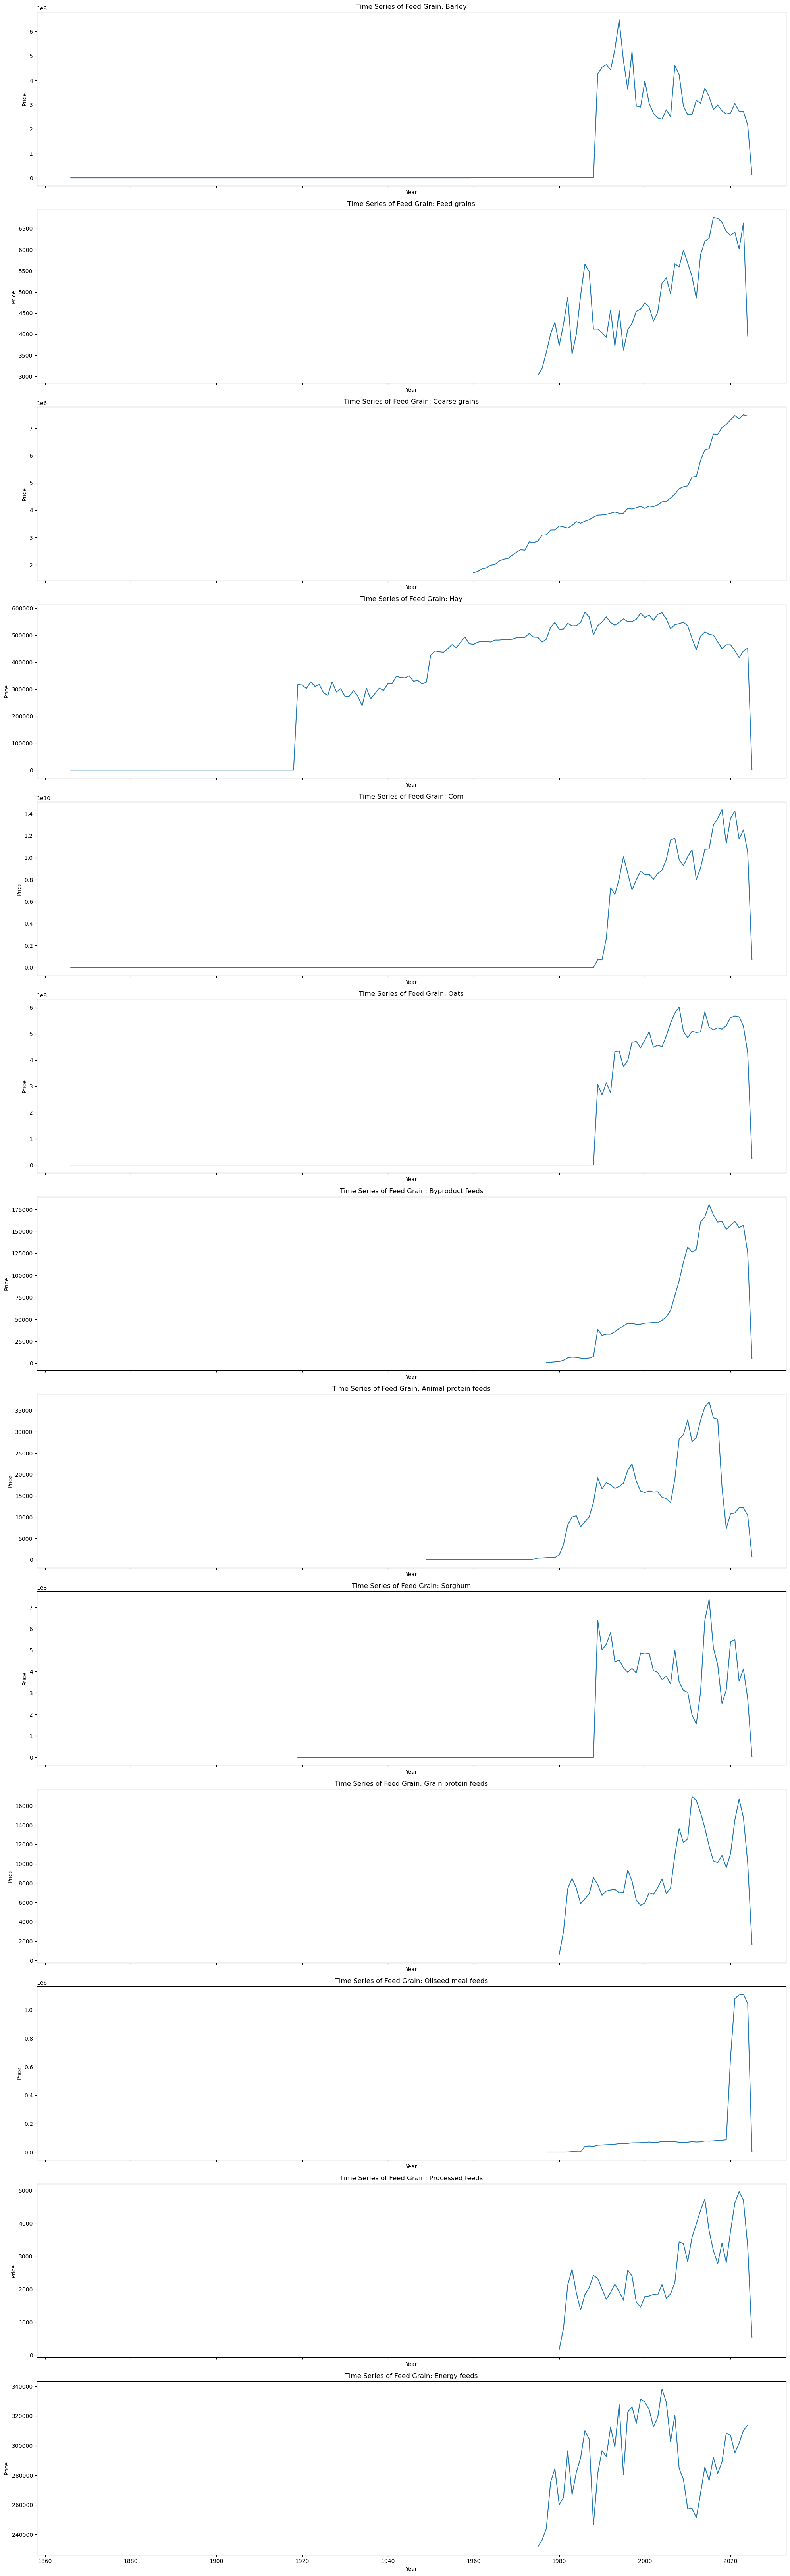

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Amount' is numeric
final_combined_df['Price'] = pd.to_numeric(final_combined_df['Price'], errors='coerce')

# Ensure 'Year' column exists and is datetime-like
if not pd.api.types.is_datetime64_any_dtype(final_combined_df['Year']):
    final_combined_df['Year'] = pd.to_datetime(final_combined_df['Year'], format='%Y', errors='coerce')

# Set Year as index for time-based grouping
final_combined_df = final_combined_df.set_index('Year')

# Get unique commodities
commodities = final_combined_df['Commodity_Type'].dropna().unique()

# Create a figure with one subplot per commodity
n = len(commodities)
fig, axes = plt.subplots(n, 1, figsize=(20, 5 * n), sharex=True)

# If only one commodity, make axes a list to avoid indexing errors
if n == 1:
    axes = [axes]

# Group by commodity and resample annually
for i, commodity in enumerate(commodities):
    commodity_df = final_combined_df[final_combined_df['Commodity_Type'] == commodity]
    yearly = commodity_df['Price'].resample('A').sum()  # Resample yearly

    axes[i].plot(yearly.index.year, yearly.values)
    axes[i].set_title(f"Time Series of Feed Grain: {commodity}")
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [93]:
# Create correlation matrix between 'Price' and 'gdp'
correlation_matrix = final_combined_df[['Price', 'gdp']].corr()
print(correlation_matrix)

         Price      gdp
Price  1.00000  0.14537
gdp    0.14537  1.00000


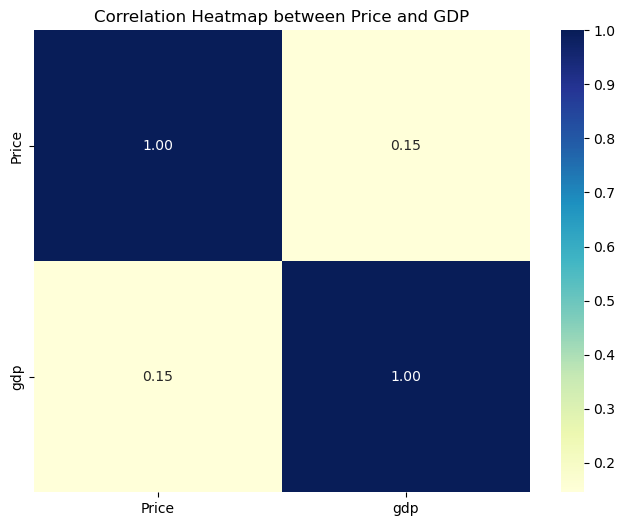

In [96]:
# Create heatmap for correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap between Price and GDP')
plt.show()

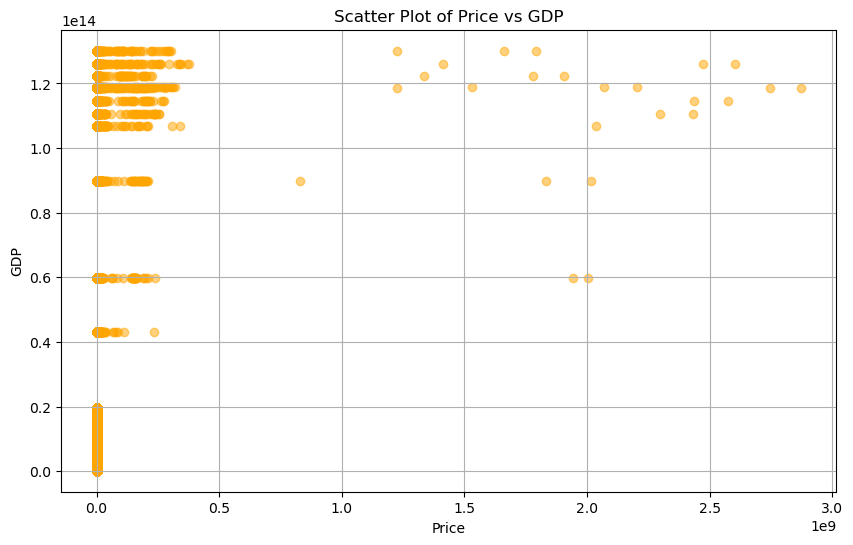

In [105]:
# Create scatter plot for Price vs GDP
plt.figure(figsize=(10, 6))
plt.scatter(final_combined_df['Price'], final_combined_df['gdp'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Price vs GDP')
plt.xlabel('Price')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

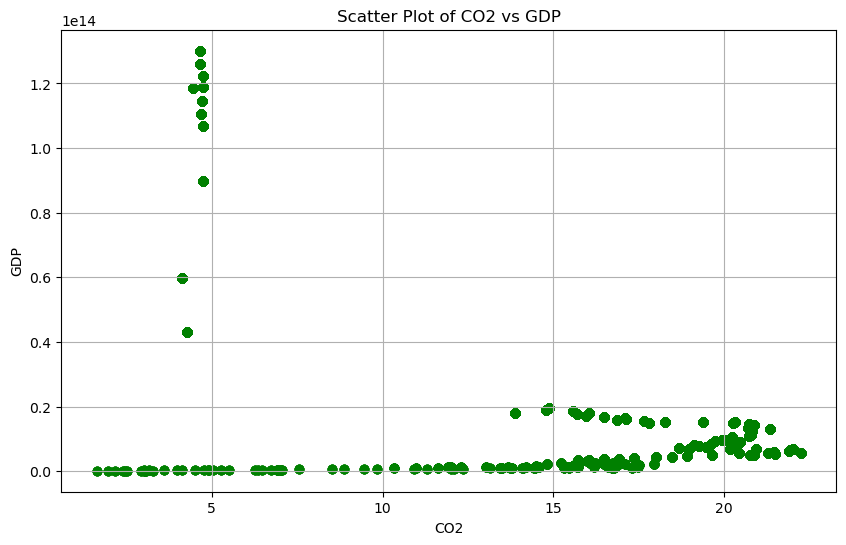

In [107]:
# Craete scatter plot for CO2 vs GDP
plt.figure(figsize=(10, 6))
plt.scatter(final_combined_df['co2_per_capita'], final_combined_df['gdp'], alpha=0.5, color='green')
plt.title('Scatter Plot of CO2 vs GDP')
plt.xlabel('CO2')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

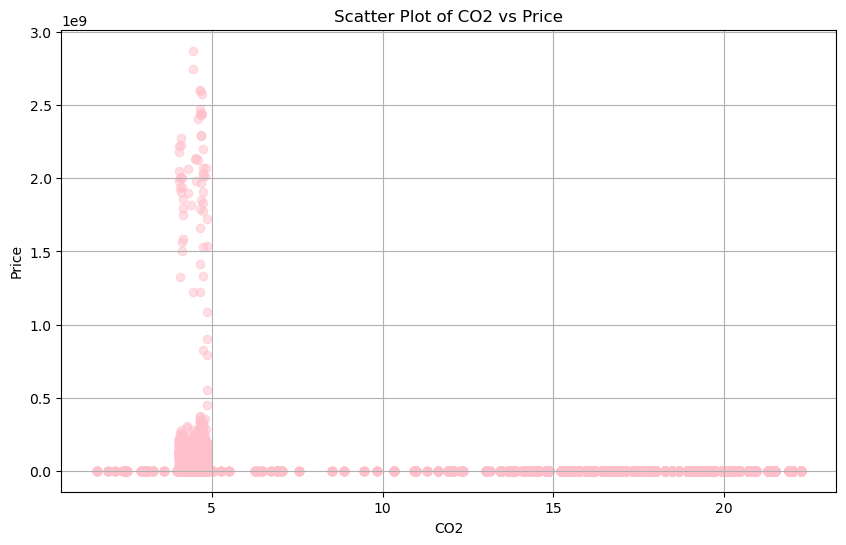

In [115]:
#Create Visualization for CO2 vs Price
plt.figure(figsize=(10, 6))
plt.scatter(final_combined_df['co2_per_capita'], final_combined_df['Price'], alpha=0.5, color='pink')
plt.title('Scatter Plot of CO2 vs Price')
plt.xlabel('CO2')
plt.ylabel('Price')
plt.grid(True)
plt.show()